<a href="https://colab.research.google.com/github/lucasdelimanogueira/evolutionary-computation-exercises/blob/main/Evolutionary_Computation_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import numpy as np
import random
import math
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from time import time
import collections

# Optimization Problems

## Evolutionary Strategy

In [ ]:
class Individual_ES:
  def __init__(self, dimension, lower_bound, upper_bound):
    self.dimension=dimension
    self.upper_bound = upper_bound
    self.lower_bound = lower_bound
    self.solution = np.array([np.random.uniform(self.lower_bound[i] * 1.0, self.upper_bound[i] * 1.0) for i in range(self.dimension)])
    self.sigma = 1

  def mutate(self, step, probability=1):
    for i in range(self.dimension):
      rand = random.random()

      if rand <= probability:
        t = 1/(np.sqrt(step)+1)
        self.sigma = self.sigma * np.exp(t*np.random.normal(loc=0, scale=1))
        self.solution[i] += self.sigma * np.random.normal(loc=0,scale=1)

        if self.solution[i] < self.lower_bound[i]:
            self.solution[i] = self.lower_bound[i]
        elif self.solution[i] > self.upper_bound[i]:
            self.solution[i] = self.upper_bound[i]

class EvolutionStrategy:
  def __init__(self, mu, lamb, mutation, lower_bound, upper_bound, dimension, problem, generations):
    self.mu = mu
    self.mutation = mutation
    self.lamb = lamb
    self.population_size = mu
    self.upper_bound = upper_bound
    self.lower_bound = lower_bound
    self.dimension = dimension
    self.problem = problem
    self.step = 0
    self.generations = generations
    self.results = []

  def generate(self):
    self.population = []
    for _ in range(self.population_size):
      self.population.append( Individual_ES(self.dimension, self.lower_bound, self.upper_bound) )

  def evaluate(self):
    if self.problem is 'Sphere':

      for individual in self.population:
        total = 0
        individual.objective = np.sum(individual.solution**2)

    elif self.problem is 'Rastrigin':

      for individual in self.population:

        individual.objective = 10*2 + np.sum(individual.solution**2-10*np.cos(2*np.pi*individual.solution))

    elif self.problem is 'Goldstein_Price':

      for individual in self.population:
        x = individual.solution[0]
        y = individual.solution[1]

        f = (1 + ((x+y+1)**2) * (19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+((2*x-3*y)**2)*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))
        individual.objective = f

    elif self.problem is 'Himmelblau':

      for individual in self.population:
        x = individual.solution[0]
        y = individual.solution[1]

        f = (x**2+y-11)**2 + (x+y**2-7)**2
        individual.objective = f

    elif self.problem is 'Holder':

      for individual in self.population:
        x = individual.solution[0]
        y = individual.solution[1]

        f = abs( np.sin(x)*np.cos(y)*np.exp( abs(1 - np.sqrt(x**2+y**2)/np.pi) ) )
        individual.objective = f

  def select(self):
    self.population.sort(key=lambda x: x.objective, reverse=False) # sort individuals
    self.population = self.population[0:self.mu] # get top mu lowest individuals


  def reproduct(self):
    offspring_population = []

    for individual in self.population:
      for j in range(int(self.lamb / self.mu)):
        child = deepcopy(individual)
        child.mutate(step=self.step, probability=self.mutation)
        offspring_population.append(child)
    self.population = offspring_population

    self.step += 1

  def save_results(self):
    self.x_values = [i.solution[0] for i in self.population]
    self.y_values = [i.solution[1] for i in self.population]
    self.results.append((self.x_values, self.y_values))

  def run(self):

    self.generate()
    for n in range(self.generations):
      self.evaluate()
      self.select()
      self.reproduct()
      self.save_results()

    self.best_solution = self.population[0].solution
    self.best_objective = self.population[0].objective



In [ ]:
es_sphere = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100)
es_sphere.run()
print('Best Solution: ', es_sphere.best_solution )
print('Best Objective: ', es_sphere.best_objective )

Best Solution:  [-0.00204918 -0.00012912]
Best Objective:  4.21581500124646e-06


In [ ]:
es_rastrigin = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100)
es_rastrigin.run()
print('Best Solution: ', es_rastrigin.best_solution )
print('Best Objective: ', es_rastrigin.best_objective )

Best Solution:  [-0.00075223 -0.00016716]
Best Objective:  0.00011780281096918088


In [ ]:
es_goldstein_price = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100)
es_goldstein_price.run()
print('Best Solution: ', es_goldstein_price.best_solution )
print('Best Objective: ', es_goldstein_price.best_objective )

Best Solution:  [ 0.00245153 -1.00004347]
Best Objective:  3.0015402612645525


In [ ]:
es_himmelblau = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100)
es_himmelblau.run()
print('Best Solution: ', es_himmelblau.best_solution )
print('Best Objective: ', es_himmelblau.best_objective )

Best Solution:  [2.8        2.45228256]
Best Objective:  1.166252150304216


In [ ]:
es_holder = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100)
es_holder.run()
print('Best Solution: ', es_holder.best_solution )
print('Best Objective: ', es_holder.best_objective )

Best Solution:  [-3.14156048  7.85367463]
Best Objective:  5.3656558039336104e-08


## Differential Evolution

In [ ]:
class Individual_DE:
  def __init__(self, dimension, lower_bound, upper_bound):
    self.dimension=dimension
    self.upper_bound = upper_bound
    self.lower_bound = lower_bound
    self.solution = np.array([np.random.uniform(self.lower_bound[i] * 1.0, self.upper_bound[i] * 1.0) for i in range(self.dimension)])

class DifferentialEvolution:
  def __init__(self, F, CR, lower_bound, upper_bound, dimension, problem, generations, population_size):
    self.F = F
    self.CR = CR
    self.population_size = population_size
    self.upper_bound = upper_bound
    self.lower_bound = lower_bound
    self.dimension = dimension
    self.problem = problem
    self.step = 0
    self.generations = generations
    self.results = []

  def generate(self):
    self.population = []
    for _ in range(self.population_size):
      self.population.append( Individual_DE(self.dimension, self.lower_bound, self.upper_bound) )

  def mutate(self):
    new_population = []
    for i in range(self.population_size):

      while True:
        random_numbers = random.sample(range(0, self.population_size), 3)
        if i not in random_numbers:
          break

      r1, r2, r3 = random_numbers

      new_individual = Individual_DE(self.dimension, self.lower_bound, self.upper_bound)
      for j in range(self.dimension):
        v_j = self.population[r1].solution[j] + self.F * (self.population[r2].solution[j] - self.population[r3].solution[j])

        if v_j < self.lower_bound[j]:
          v_j = self.lower_bound[j]
        elif v_j > self.upper_bound[j]:
          v_j = self.upper_bound[j]

        rand = random.random()

        if rand <= self.CR:
          new_individual.solution[j] = v_j
        else:
          new_individual.solution[j] = self.population[i].solution[j]

      if self.evaluate(new_individual) < self.evaluate(self.population[i]):
        new_population.append(new_individual)
      else:
        new_population.append(self.population[i])

    self.population = new_population

  def evaluate(self, individual):

    if self.problem is 'Sphere':
      f = np.sum(individual.solution**2)
      individual.objective = f
      return f

    elif self.problem is 'Rastrigin':
      f = 10*2 + np.sum(individual.solution**2-10*np.cos(2*np.pi*individual.solution))
      individual.objective = f
      return f

    elif self.problem is 'Goldstein_Price':
      x = individual.solution[0]
      y = individual.solution[1]

      f = (1 + ((x+y+1)**2) * (19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+((2*x-3*y)**2)*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))
      individual.objective = f
      return f

    elif self.problem is 'Himmelblau':
      x = individual.solution[0]
      y = individual.solution[1]

      f = (x**2+y-11)**2 + (x+y**2-7)**2
      individual.objective = f
      return f

    elif self.problem is 'Holder':
      x = individual.solution[0]
      y = individual.solution[1]

      f = abs( np.sin(x)*np.cos(y)*np.exp( abs(1 - np.sqrt(x**2+y**2)/np.pi) ) )
      individual.objective = f
      return f

  def get_top(self):
    self.population.sort(key=lambda x: x.objective, reverse=False) # sort individuals
    return self.population[0] # get top lamb lowest individuals

  def save_results(self):
    self.x_values = [i.solution[0] for i in self.population]
    self.y_values = [i.solution[1] for i in self.population]
    self.results.append((self.x_values, self.y_values))

  def run(self):

    self.generate()
    for n in range(self.generations):
      self.mutate()
      self.save_results()

    self.best_solution = self.get_top().solution
    self.best_objective = self.get_top().objective

In [ ]:
de_sphere = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100, population_size=100)
de_sphere.run()
print('Best Solution: ', de_sphere.best_solution )
print('Best Objective: ', de_sphere.best_objective )

Best Solution:  [5.75463086e-12 3.06588174e-12]
Best Objective:  4.2515407227338046e-23


In [ ]:
de_rastrigin = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100, population_size=100)
de_rastrigin.run()
print('Best Solution: ', de_rastrigin.best_solution )
print('Best Objective: ', de_rastrigin.best_objective )

Best Solution:  [-2.23887937e-09  1.58079888e-09]
Best Objective:  0.0


In [ ]:
de_goldstein_price = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100, population_size=100)
de_goldstein_price.run()
print('Best Solution: ', de_goldstein_price.best_solution )
print('Best Objective: ', de_goldstein_price.best_objective )

Best Solution:  [ 9.47727074e-10 -1.00000000e+00]
Best Objective:  2.9999999999999254


In [ ]:
de_himmelblau = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100, population_size=100)
de_himmelblau.run()
print('Best Solution: ', de_himmelblau.best_solution )
print('Best Objective: ', de_himmelblau.best_objective )

Best Solution:  [2.8        2.10928189]
Best Objective:  1.16604445715281


In [ ]:
de_holder = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100, population_size=100)
de_holder.run()
print('Best Solution: ', de_holder.best_solution )
print('Best Objective: ', de_holder.best_objective )

Best Solution:  [ 6.28318629 -1.57053813]
Best Objective:  7.322172922009084e-10


## EDA

In [ ]:
class Individual_EDA:
  def __init__(self, dimension, lower_bound, upper_bound):
    self.dimension=dimension
    self.upper_bound = upper_bound
    self.lower_bound = lower_bound
    self.solution = np.array([np.random.uniform(self.lower_bound[i] * 1.0, self.upper_bound[i] * 1.0) for i in range(self.dimension)])

class EDA:
  def __init__(self, N, lower_bound, upper_bound, dimension, problem, generations, population_size):
    self.N = N
    self.population_size = population_size
    self.upper_bound = upper_bound
    self.lower_bound = lower_bound
    self.dimension = dimension
    self.problem = problem
    self.step = 0
    self.generations = generations
    self.results = []
    self.population = []

  def generate(self):
    self.population.clear()
    for _ in range(self.population_size):
      self.population.append( Individual_EDA(self.dimension, self.lower_bound, self.upper_bound) )

  def evaluate(self):
    if self.problem is 'Sphere':

      for individual in self.population:
        total = 0
        individual.objective = np.sum(individual.solution**2)

    elif self.problem is 'Rastrigin':

      for individual in self.population:

        individual.objective = 10*2 + np.sum(individual.solution**2-10*np.cos(2*np.pi*individual.solution))

    elif self.problem is 'Goldstein_Price':

      for individual in self.population:
        x = individual.solution[0]
        y = individual.solution[1]

        f = (1 + ((x+y+1)**2) * (19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+((2*x-3*y)**2)*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))
        individual.objective = f

    elif self.problem is 'Himmelblau':

      for individual in self.population:
        x = individual.solution[0]
        y = individual.solution[1]

        f = (x**2+y-11)**2 + (x+y**2-7)**2
        individual.objective = f

    elif self.problem is 'Holder':

      for individual in self.population:
        x = individual.solution[0]
        y = individual.solution[1]

        f = abs( np.sin(x)*np.cos(y)*np.exp( abs(1 - np.sqrt(x**2+y**2)/np.pi) ) )
        individual.objective = f

  def select(self):
    self.population.sort(key=lambda x: x.objective, reverse=False) # sort individuals
    self.population = self.population[0:self.N] # get top N lowest individuals


  def estimate_distribution(self):

    self.mean = np.zeros((1,self.dimension))
    self.sigma = np.zeros((self.dimension, self.dimension))

    df = np.empty((1,self.dimension))
    for individual in self.population:
      df = np.vstack((df, individual.solution.reshape(1,self.dimension)))
    df = np.delete(df, (0), axis=0)

    self.mean = df.mean(axis=0)
    self.cov = (df-self.mean).T@(df-self.mean)/df.size

  def sample(self):
    self.population.clear()
    for i in range(self.population_size):
      self.population.append( Individual_EDA(self.dimension, self.lower_bound, self.upper_bound) )
      self.population[i].solution = np.random.multivariate_normal(mean = self.mean, cov = self.cov)

      for j in range(self.dimension):
        if self.population[i].solution[j] < self.lower_bound[j]:
          self.population[i].solution[j] = self.lower_bound[j]
        elif self.population[i].solution[j] > self.upper_bound[j]:
          self.population[i].solution[j] = self.upper_bound[j]

  def save_results(self):
    self.x_values = [i.solution[0] for i in self.population]
    self.y_values = [i.solution[1] for i in self.population]
    self.results.append((self.x_values, self.y_values))

  def run(self):

    self.generate()
    for n in range(self.generations):
      self.save_results()
      self.evaluate()
      self.select()
      self.estimate_distribution()
      self.sample()

    self.evaluate()
    self.select()

    self.best_solution = self.population[0].solution
    self.best_objective = self.population[0].objective

In [ ]:
eda_sphere = EDA(N=20, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100, population_size=100)
eda_sphere.run()
print('Best Solution: ', eda_sphere.best_solution )
print('Best Objective: ', eda_sphere.best_objective )

Best Solution:  [ 5.73249373e-41 -1.06732082e-41]
Best Objective:  3.400065805156719e-81


In [ ]:
eda_rastrigin = EDA(N=20, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100, population_size=100)
eda_rastrigin.run()
print('Best Solution: ', eda_rastrigin.best_solution )
print('Best Objective: ', eda_rastrigin.best_objective )

Best Solution:  [-0.01794039  0.0013451 ]
Best Objective:  0.06414572819924302


In [ ]:
eda_goldstein_price = EDA(N=20, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100, population_size=100)
eda_goldstein_price.run()
print('Best Solution: ', eda_goldstein_price.best_solution )
print('Best Objective: ', eda_goldstein_price.best_objective )

Best Solution:  [ 0.06385184 -0.85338652]
Best Objective:  14.309937653908428


In [ ]:
eda_himmelblau = EDA(N=20, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100, population_size=100)
eda_himmelblau.run()
print('Best Solution: ', eda_himmelblau.best_solution )
print('Best Objective: ', eda_himmelblau.best_objective )

Best Solution:  [2.67032087 1.88436771]
Best Objective:  4.546887135106802


In [ ]:
eda_holder = EDA(N=20, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100, population_size=100)
eda_holder.run()
print('Best Solution: ', eda_holder.best_solution )
print('Best Objective: ', eda_holder.best_objective )

Best Solution:  [-5.18944002e-11 -1.57079633e+00]
Best Objective:  5.239002352641084e-27


## Genetic Programming

In [ ]:
def add(x, y):
  return x+y

def sub(x, y):
  return x-y

def mul(x, y):
  return x*y

class GPTree:
  def __init__(self, min_depth, max_depth):
    self.data = None
    self.left = None
    self.right = None
    self.functions = [add, sub, mul]
    #self.terminals = ['x', np.random.normal(size=2), np.random.normal(size=2), np.random.normal(size=2), np.random.normal(size=2), np.random.normal(size=2)]
    self.terminals = ['x', np.array([-2,-2]), np.array([-1,-1]), np.array([0,0]), np.array([1,1]), np.array([2,2])]
    self.fitness = 0.1
    self.min_depth = min_depth
    self.max_depth = max_depth
    self.input = np.array([0,0])

  def none_label(self):
    if (self.data in self.functions):
      return self.data__name__
    else:
      return str(self.data)

  def print_tree(self, prefix = ""): # print textual
    print("%s%s" % (prefix, self.node_label()))
    if self.left:  self.left.print_tree (prefix + "   ")
    if self.right: self.right.print_tree(prefix + "   ")

  def compute_tree(self, x):
    if not isinstance(self.data, np.ndarray):
      if self.data in self.functions:
        return self.data(self.left.compute_tree(x), self.right.compute_tree(x))

      elif self.data == 'x':
        return x

    else:
      return self.data

  def random_tree(self, grow, min_depth, max_depth, depth = 0):
    if depth < min_depth or (depth < max_depth and not grow):
      self.data = self.functions[random.randint(0, len(self.functions)-1)]
    elif depth >= max_depth:
      self.data = self.terminals[random.randint(0, len(self.terminals)-1)]
    else:
      if random.random() > 0.5:
        self.data = self.terminals[random.randint(0, len(self.terminals)-1)]
      else:
        self.data = self.functions[random.randint(0, len(self.functions)-1)]

    if not isinstance(self.data, np.ndarray):
      if self.data in self.functions:
          self.left = GPTree(min_depth, max_depth)
          self.left.random_tree(grow, min_depth, max_depth, depth = depth + 1)
          self.right = GPTree(min_depth, max_depth)
          self.right.random_tree(grow, min_depth, max_depth, depth = depth + 1)

  def mutation(self, mutation_rate):
    if random.random() < mutation_rate: # mutação nesse nó
        self.random_tree(grow = True, min_depth=self.min_depth, max_depth = 2)
    elif self.left:
      self.left.mutation(mutation_rate)
    elif self.right:
      self.right.mutation(mutation_rate)


  def size(self): # tamanho da árvore em nós
    if isinstance(self.data, np.ndarray): return 1
    l = self.left.size()  if self.left  else 0
    r = self.right.size() if self.right else 0
    return 1 + l + r

  def build_subtree(self): # count é list, então é passado por referência
    t = GPTree(self.min_depth, self.max_depth)
    t.data = self.data
    if self.left:  t.left  = self.left.build_subtree()
    if self.right: t.right = self.right.build_subtree()
    return t


  def scan_tree(self, count, second): # count é list, então é passado por referência
    count[0] -= 1
    if count[0] <= 1:
      if not second: # retorna subtree enraizada aqui
        return self.build_subtree()
      else: # cola subtree aqui
        self.data  = second.data
        self.left  = second.left
        self.right = second.right
    else:
      ret = None
      if self.left  and count[0] > 1: ret = self.left.scan_tree(count, second)
      if self.right and count[0] > 1: ret = self.right.scan_tree(count, second)
      return ret

  def crossover(self, other, crossover_rate): # xo 2 trees at random nodes
    if random.random() < crossover_rate:
      second = other.scan_tree([random.randint(1, other.size())], None) # 2a tree aleatória
      self.scan_tree([random.randint(1, self.size())], second) # 2a subtree "colada" dentro da 1a

class GeneticProgramming:
  def __init__(self, min_depth, max_depth, lower_bound, upper_bound, problem, mutation_rate, crossover_rate, generations, population_size):
    self.population_size = population_size
    self.min_depth = min_depth
    self.max_depth = max_depth
    self.generations = generations
    self.problem = problem
    self.lower_bound = lower_bound
    self.upper_bound = upper_bound
    self.mutation_rate = mutation_rate
    self.crossover_rate = crossover_rate
    self.population = []
    self.results = []

  def generate(self):
    self.population = []
    for md in range(3, self.max_depth + 1):
      for i in range(int(self.population_size/6)):
        t = GPTree(self.min_depth, self.max_depth)
        t.random_tree(grow = True, min_depth = self.min_depth, max_depth = md) # grow
        self.population.append(t)
      for i in range(int(self.population_size/6)):
        t = GPTree(self.min_depth, self.max_depth)
        t.random_tree(grow = False, min_depth = self.min_depth, max_depth = md) # full
        self.population.append(t)

  def evaluate(self):
    for individual in self.population:
      x,y = individual.compute_tree(np.random.normal(size=2))

      if x < self.lower_bound[0]:
        x = self.lower_bound[0]
      elif x > self.upper_bound[0]:
        x = self.upper_bound[0]

      if y < self.lower_bound[1]:
        y = self.lower_bound[1]
      elif y > self.upper_bound[1]:
        y = self.upper_bound[1]

      individual.solution = [x,y]


      if self.problem is 'Sphere':
        f = x**2 + y**2
        individual.fitness = f

      elif self.problem is 'Rastrigin':
        f = 10*2 + x**2-10*np.cos(2*np.pi*x) + y**2-10*np.cos(2*np.pi*y)
        individual.fitness = f

      elif self.problem is 'Goldstein_Price':
        f = (1 + ((x+y+1)**2) * (19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+((2*x-3*y)**2)*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))
        individual.fitness = f

      elif self.problem is 'Himmelblau':
        f = (x**2+y-11)**2 + (x+y**2-7)**2
        individual.fitness = f

      elif self.problem is 'Holder':
        f = abs( np.sin(x)*np.cos(y)*np.exp( abs(1 - np.sqrt(x**2+y**2)/np.pi) ) )
        individual.fitness = f

  def select(self):
    """Amostra um indivíduo com probabilidade de acordo com o fitness
    1-Gera um valor aleatório rand_value
    2-Itera sobre os individuos imaginando que respectivos fitness estão empilhados
    3-Compara o valor rand com a altura da pilha e seleciona o individuo na mesma altura
    ex: AAAAAAAAABBBBCCCCCC # pilha de individuos A,B,C com fitness 9, 4 e 6, respectivamente
        VVVV # rand_value = 4, seleciona o individuo A
        VVVVVVVVVVVV # rand_value = 12, seleciona individuo B
        VVVVVVVVVVVVVVVVV # rand_value = 17, seleciona individuo C
    """

    rand_value = self.total_fitness * random.random()
    for individual in self.population:
      rand_value = rand_value - individual.fitness

      if rand_value <= 0:
        return deepcopy(individual)

  def calculate_total_fitness(self):
    self.total_fitness = 0

    for individual in self.population:
      self.total_fitness += individual.fitness

  def reproduct(self):
    self.calculate_total_fitness()
    childs = []

    for n in range(self.population_size):
      parent_a = self.select() # amostra um individuo da população
      parent_b = self.select() # amostra outro individuo da população

      parent_a.crossover(parent_b, self.crossover_rate) #crossover
      parent_a.mutation(self.mutation_rate) #mutation

      childs.append(parent_a)

    self.population = deepcopy(childs)

  def save_results(self):
    self.x_values = [i.solution[0] for i in self.population]
    self.y_values = [i.solution[1] for i in self.population]
    self.results.append((self.x_values, self.y_values))

  def get_top(self):
    self.population.sort(key=lambda x: x.fitness, reverse=False) # sort individuals
    return self.population[0] # get top lamb lowest individuals

  def save_results(self):
    self.x_values = [i.solution[0] for i in self.population]
    self.y_values = [i.solution[1] for i in self.population]
    self.results.append((self.x_values, self.y_values))

  def run(self):
    self.generate()
    for i in range(self.generations):
      self.reproduct()
      self.evaluate()
      self.save_results()

    self.best_solution = self.get_top().solution
    self.best_objective = self.get_top().fitness


In [ ]:
gp_sphere = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-3,-3], upper_bound=[3,3], problem='Sphere', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_sphere.run()
print('Best Solution: ', gp_sphere.best_solution )
print('Best Objective: ', gp_sphere.best_objective )

Best Solution:  [0.0, 0.0]
Best Objective:  0.0


In [ ]:
gp_rastrigin = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], problem='Rastrigin', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_rastrigin.run()
print('Best Solution: ', gp_rastrigin.best_solution )
print('Best Objective: ', gp_rastrigin.best_objective )

Best Solution:  [-0.0, -0.0]
Best Objective:  0.0


In [ ]:
gp_goldstein_price = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-3,-3], upper_bound=[3,3], problem='Goldstein_Price', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_goldstein_price.run()
print('Best Solution: ', gp_goldstein_price.best_solution )
print('Best Objective: ', gp_goldstein_price.best_objective )

Best Solution:  [-0.0, -0.0]
Best Objective:  600.0


In [ ]:
gp_himmelblau = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], problem='Himmelblau', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_himmelblau.run()
print('Best Solution: ', gp_himmelblau.best_solution )
print('Best Objective: ', gp_himmelblau.best_objective )

Best Solution:  [2.8, 2.8]
Best Objective:  13.379199999999994


In [ ]:
gp_holder = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-20,-20], upper_bound=[20,20], problem='Holder', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_holder.run()
print('Best Solution: ', gp_holder.best_solution )
print('Best Objective: ', gp_holder.best_objective )

Best Solution:  [-20, -20]
Best Objective:  1114.0940051214868


## Visualização

### Sphere

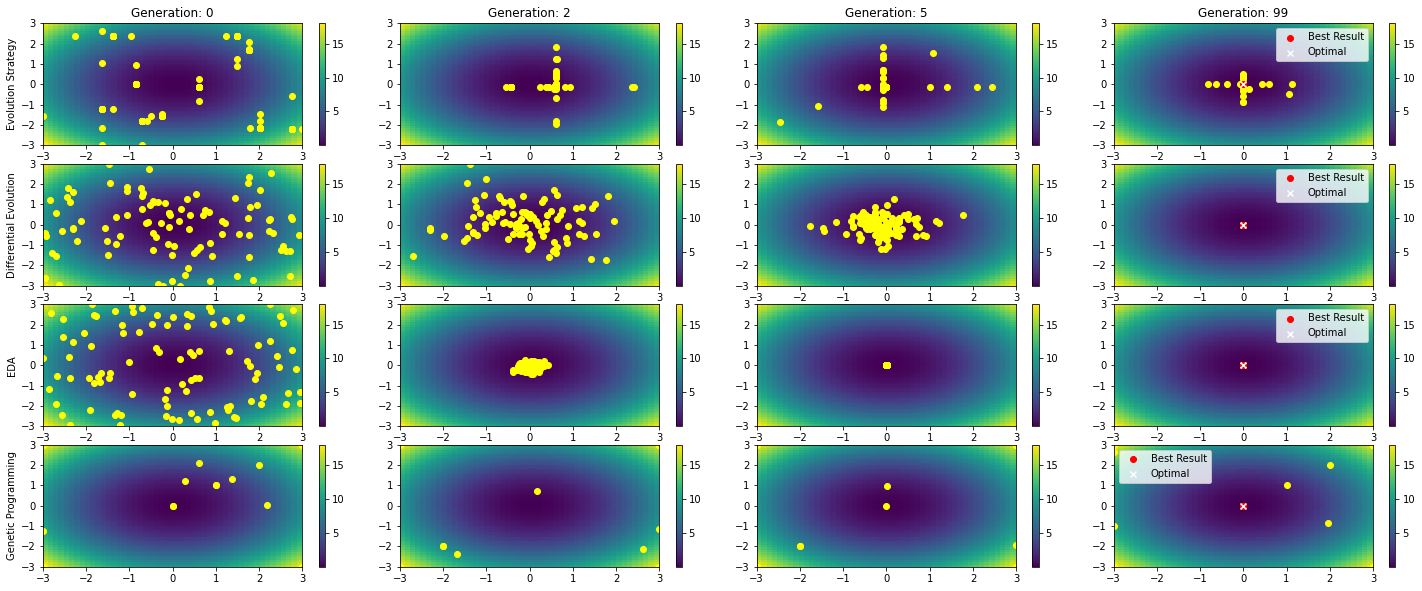

In [ ]:
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
x, y = np.meshgrid(x,y)
z = x**2 + y**2


fig, axs = plt.subplots(4, 4, figsize=(25,10))
axs[0,0].set_title('Generation: 0')
axs[0,1].set_title('Generation: 2')
axs[0,2].set_title('Generation: 5')
axs[0,3].set_title('Generation: 99')

plt.subplots_adjust(hspace=0.15)
plt.subplots_adjust(wspace=0.1)

axs[0,0].set_ylabel('Evolution Strategy')
axs[1,0].set_ylabel('Differential Evolution')
axs[2,0].set_ylabel('EDA')
axs[3,0].set_ylabel('Genetic Programming')

for i, epoch in enumerate([0, 2, 5, 99]):

  # Evolution Strategy
  c = axs[0,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[0,i])
  axs[0,i].scatter(es_sphere.results[epoch][0], es_sphere.results[epoch][1], color='yellow')

  # Differential Evolution
  c = axs[1,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[1,i])
  axs[1,i].scatter(de_sphere.results[epoch][0], de_sphere.results[epoch][1], color='yellow')

  # EDA
  c = axs[2,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[2,i])
  axs[2,i].scatter(eda_sphere.results[epoch][0], eda_sphere.results[epoch][1], color='yellow')

  # Genetic Programming
  c = axs[3,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[3,i])
  axs[3,i].scatter(gp_sphere.results[epoch][0], gp_sphere.results[epoch][1], color='yellow')

axs[0,-1].scatter(es_sphere.best_solution[0], es_sphere.best_solution[1], color='red', label='Best Result')
axs[1,-1].scatter(de_sphere.best_solution[0], de_sphere.best_solution[1], color='red', label='Best Result')
axs[2,-1].scatter(eda_sphere.best_solution[0], eda_sphere.best_solution[1], color='red', label='Best Result')
axs[3,-1].scatter(gp_sphere.best_solution[0], gp_sphere.best_solution[1], color='red', label='Best Result')

axs[0,-1].scatter(0,0, color='white', label='Optimal', marker='x')
axs[1,-1].scatter(0,0, color='white', label='Optimal', marker='x')
axs[2,-1].scatter(0,0, color='white', label='Optimal', marker='x')
axs[3,-1].scatter(0,0, color='white', label='Optimal', marker='x')

axs[0,-1].legend()
axs[1,-1].legend()
axs[2,-1].legend()
axs[3,-1].legend()

plt.show()

### Rastrigin

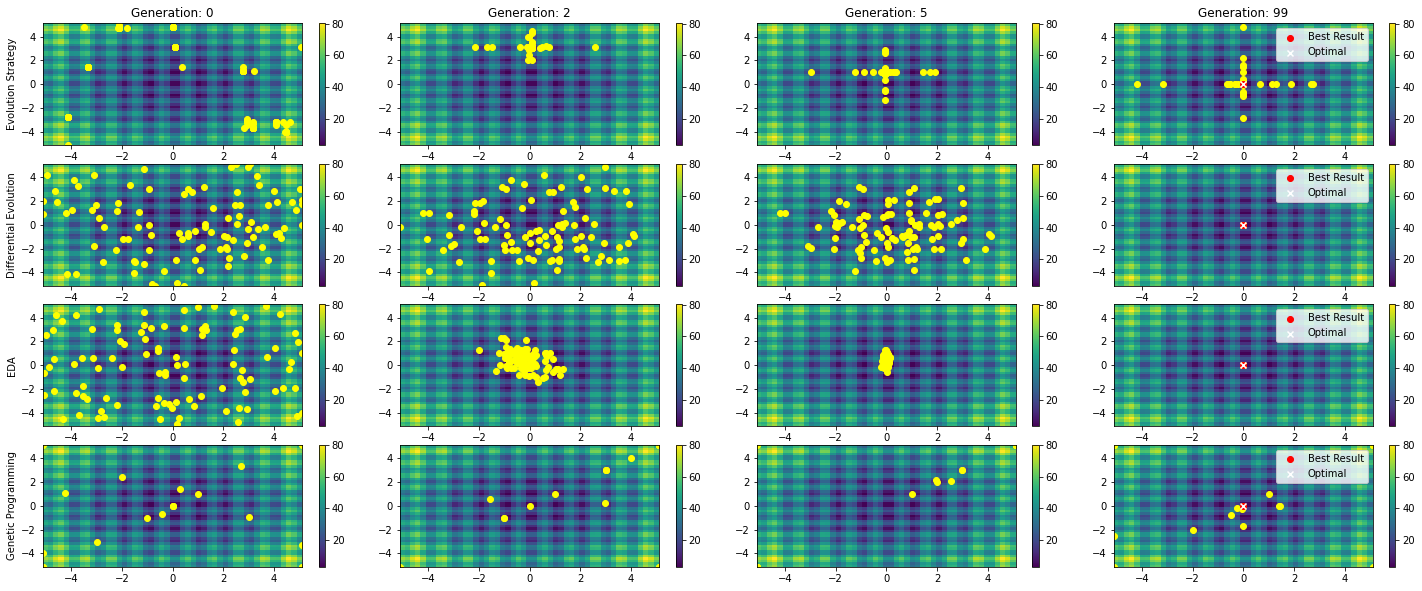

In [ ]:
x = np.linspace(-5.12, 5.12, 50)
y = np.linspace(-5.12, 5.12, 50)
x, y = np.meshgrid(x,y)
z = 10*2 + x**2-10*np.cos(2*np.pi*x) + y**2-10*np.cos(2*np.pi*y)

fig, axs = plt.subplots(4, 4, figsize=(25,10))
axs[0,0].set_title('Generation: 0')
axs[0,1].set_title('Generation: 2')
axs[0,2].set_title('Generation: 5')
axs[0,3].set_title('Generation: 99')

plt.subplots_adjust(hspace=0.15)
plt.subplots_adjust(wspace=0.1)

axs[0,0].set_ylabel('Evolution Strategy')
axs[1,0].set_ylabel('Differential Evolution')
axs[2,0].set_ylabel('EDA')
axs[3,0].set_ylabel('Genetic Programming')

for i, epoch in enumerate([0, 2, 5, 99]):

  # Evolution Strategy
  c = axs[0,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[0,i])
  axs[0,i].scatter(es_rastrigin.results[epoch][0], es_rastrigin.results[epoch][1], color='yellow')

  # Differential Evolution
  c = axs[1,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[1,i])
  axs[1,i].scatter(de_rastrigin.results[epoch][0], de_rastrigin.results[epoch][1], color='yellow')

  # EDA
  c = axs[2,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[2,i])
  axs[2,i].scatter(eda_rastrigin.results[epoch][0], eda_rastrigin.results[epoch][1], color='yellow')

  # GP
  c = axs[3,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[3,i])
  axs[3,i].scatter(gp_rastrigin.results[epoch][0], gp_rastrigin.results[epoch][1], color='yellow')

axs[0,-1].scatter(es_rastrigin.best_solution[0], es_rastrigin.best_solution[1], color='red', label='Best Result')
axs[1,-1].scatter(de_rastrigin.best_solution[0], de_rastrigin.best_solution[1], color='red', label='Best Result')
axs[2,-1].scatter(eda_rastrigin.best_solution[0], eda_rastrigin.best_solution[1], color='red', label='Best Result')
axs[3,-1].scatter(gp_rastrigin.best_solution[0], gp_rastrigin.best_solution[1], color='red', label='Best Result')

axs[0,-1].scatter(0,0, color='white', label='Optimal', marker='x')
axs[1,-1].scatter(0,0, color='white', label='Optimal', marker='x')
axs[2,-1].scatter(0,0, color='white', label='Optimal', marker='x')
axs[3,-1].scatter(0,0, color='white', label='Optimal', marker='x')

axs[0,-1].legend()
axs[1,-1].legend()
axs[2,-1].legend()
axs[3,-1].legend()

plt.show()

### Goldstein-Price

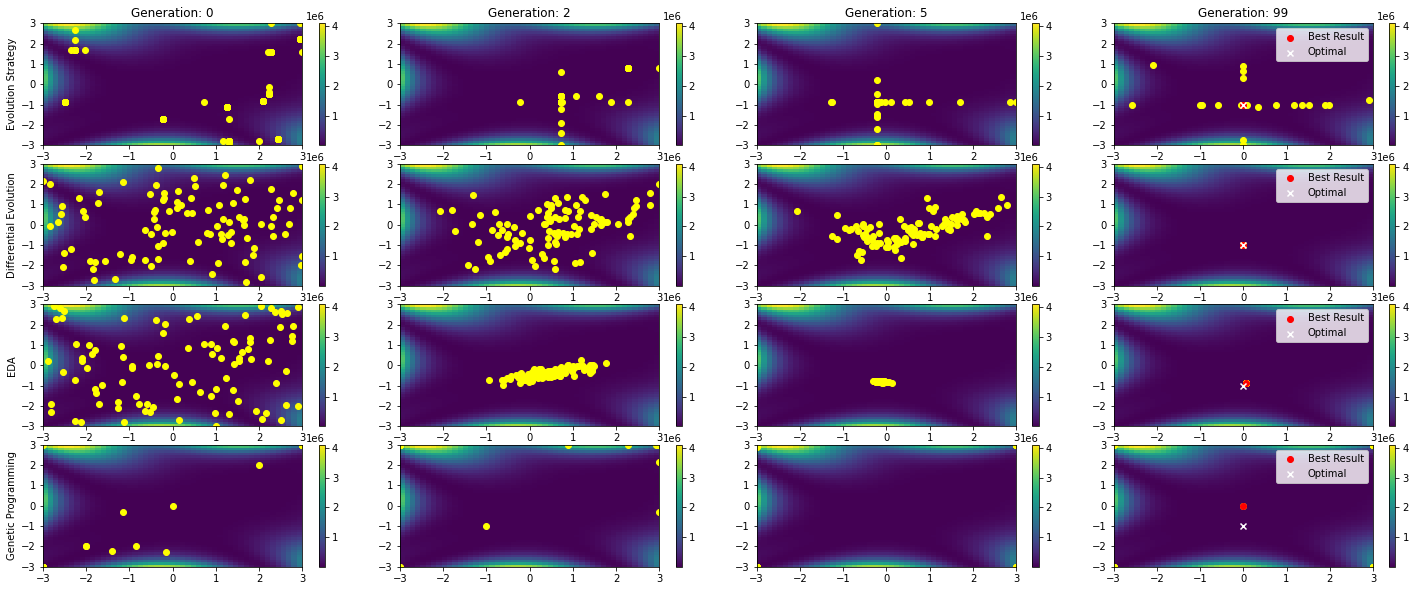

In [ ]:
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
x, y = np.meshgrid(x,y)
z = (1 + ((x+y+1)**2) * (19-14*x+3*x**2-14*y+6*x*y+3*y**2))*(30+((2*x-3*y)**2)*(18-32*x+12*x**2+48*y-36*x*y+27*y**2))

fig, axs = plt.subplots(4, 4, figsize=(25,10))
axs[0,0].set_title('Generation: 0')
axs[0,1].set_title('Generation: 2')
axs[0,2].set_title('Generation: 5')
axs[0,3].set_title('Generation: 99')

plt.subplots_adjust(hspace=0.15)
plt.subplots_adjust(wspace=0.1)

axs[0,0].set_ylabel('Evolution Strategy')
axs[1,0].set_ylabel('Differential Evolution')
axs[2,0].set_ylabel('EDA')
axs[3,0].set_ylabel('Genetic Programming')

for i, epoch in enumerate([0, 2, 5, 99]):

  # Evolution Strategy
  c = axs[0,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[0,i])
  axs[0,i].scatter(es_goldstein_price.results[epoch][0], es_goldstein_price.results[epoch][1], color='yellow')

  # Differential Evolution
  c = axs[1,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[1,i])
  axs[1,i].scatter(de_goldstein_price.results[epoch][0], de_goldstein_price.results[epoch][1], color='yellow')

  # EDA
  c = axs[2,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[2,i])
  axs[2,i].scatter(eda_goldstein_price.results[epoch][0], eda_goldstein_price.results[epoch][1], color='yellow')

  # GP
  c = axs[3,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[3,i])
  axs[3,i].scatter(gp_goldstein_price.results[epoch][0], gp_goldstein_price.results[epoch][1], color='yellow')

axs[0,-1].scatter(es_goldstein_price.best_solution[0], es_goldstein_price.best_solution[1], color='red', label='Best Result')
axs[1,-1].scatter(de_goldstein_price.best_solution[0], de_goldstein_price.best_solution[1], color='red', label='Best Result')
axs[2,-1].scatter(eda_goldstein_price.best_solution[0], eda_goldstein_price.best_solution[1], color='red', label='Best Result')
axs[3,-1].scatter(gp_goldstein_price.best_solution[0], gp_goldstein_price.best_solution[1], color='red', label='Best Result')

axs[0,-1].scatter(0,-1, color='white', label='Optimal', marker='x')
axs[1,-1].scatter(0,-1, color='white', label='Optimal', marker='x')
axs[2,-1].scatter(0,-1, color='white', label='Optimal', marker='x')
axs[3,-1].scatter(0,-1, color='white', label='Optimal', marker='x')

axs[0,-1].legend()
axs[1,-1].legend()
axs[2,-1].legend()
axs[3,-1].legend()

plt.show()

### Himmelblau

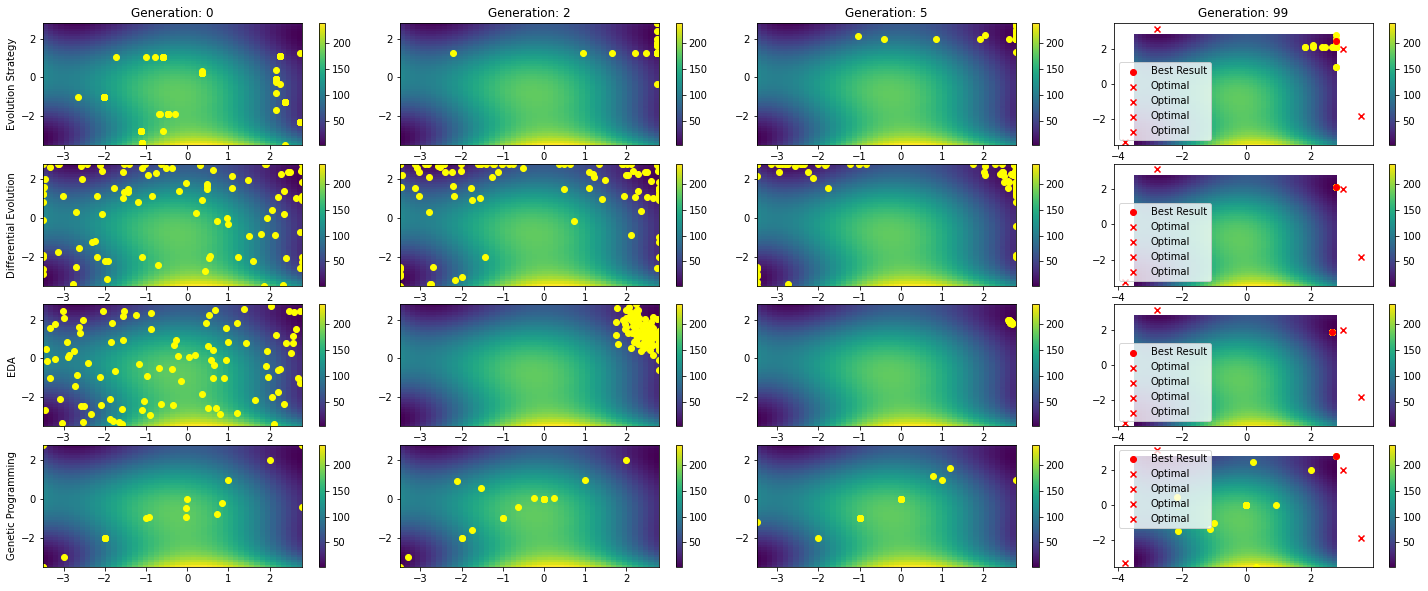

In [ ]:
x = np.linspace(-3.5, 2.8, 50)
y = np.linspace(-3.5, 2.8, 50)
x, y = np.meshgrid(x,y)
z = (x**2+y-11)**2 + (x+y**2-7)**2

fig, axs = plt.subplots(4, 4, figsize=(25,10))
axs[0,0].set_title('Generation: 0')
axs[0,1].set_title('Generation: 2')
axs[0,2].set_title('Generation: 5')
axs[0,3].set_title('Generation: 99')

plt.subplots_adjust(hspace=0.15)
plt.subplots_adjust(wspace=0.1)

axs[0,0].set_ylabel('Evolution Strategy')
axs[1,0].set_ylabel('Differential Evolution')
axs[2,0].set_ylabel('EDA')
axs[3,0].set_ylabel('Genetic Programming')

for i, epoch in enumerate([0, 2, 5, 99]):

  # Evolution Strategy
  c = axs[0,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[0,i])
  axs[0,i].scatter(es_himmelblau.results[epoch][0], es_himmelblau.results[epoch][1], color='yellow')

  # Differential Evolution
  c = axs[1,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[1,i])
  axs[1,i].scatter(de_himmelblau.results[epoch][0], de_himmelblau.results[epoch][1], color='yellow')

  # EDA
  c = axs[2,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[2,i])
  axs[2,i].scatter(eda_himmelblau.results[epoch][0], eda_himmelblau.results[epoch][1], color='yellow')

  # GP
  c = axs[3,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[3,i])
  axs[3,i].scatter(gp_himmelblau.results[epoch][0], gp_himmelblau.results[epoch][1], color='yellow')

axs[0,-1].scatter(es_himmelblau.best_solution[0], es_himmelblau.best_solution[1], color='red', label='Best Result')
axs[1,-1].scatter(de_himmelblau.best_solution[0], de_himmelblau.best_solution[1], color='red', label='Best Result')
axs[2,-1].scatter(eda_himmelblau.best_solution[0], eda_himmelblau.best_solution[1], color='red', label='Best Result')
axs[3,-1].scatter(gp_himmelblau.best_solution[0], gp_himmelblau.best_solution[1], color='red', label='Best Result')

axs[0,-1].scatter(3,2, color='red', label='Optimal', marker='x')
axs[1,-1].scatter(3,2, color='red', label='Optimal', marker='x')
axs[2,-1].scatter(3,2, color='red', label='Optimal', marker='x')
axs[3,-1].scatter(3,2, color='red', label='Optimal', marker='x')

axs[0,-1].scatter(-2.8051,3.1313, color='red', label='Optimal', marker='x')
axs[1,-1].scatter(-2.8051,3.1313, color='red', label='Optimal', marker='x')
axs[2,-1].scatter(-2.8051,3.1313, color='red', label='Optimal', marker='x')
axs[3,-1].scatter(-2.8051,3.1313, color='red', label='Optimal', marker='x')

axs[0,-1].scatter(-3.7793,-3.2832, color='red', label='Optimal', marker='x')
axs[1,-1].scatter(-3.7793,-3.2832, color='red', label='Optimal', marker='x')
axs[2,-1].scatter(-3.7793,-3.2832, color='red', label='Optimal', marker='x')
axs[3,-1].scatter(-3.7793,-3.2832, color='red', label='Optimal', marker='x')

axs[0,-1].scatter(3.5844,-1.8481, color='red', label='Optimal', marker='x')
axs[1,-1].scatter(3.5844,-1.8481, color='red', label='Optimal', marker='x')
axs[2,-1].scatter(3.5844,-1.8481, color='red', label='Optimal', marker='x')
axs[3,-1].scatter(3.5844,-1.8481, color='red', label='Optimal', marker='x')

axs[0,-1].legend()
axs[1,-1].legend()
axs[2,-1].legend()
axs[3,-1].legend()

plt.show()

### Holder Table

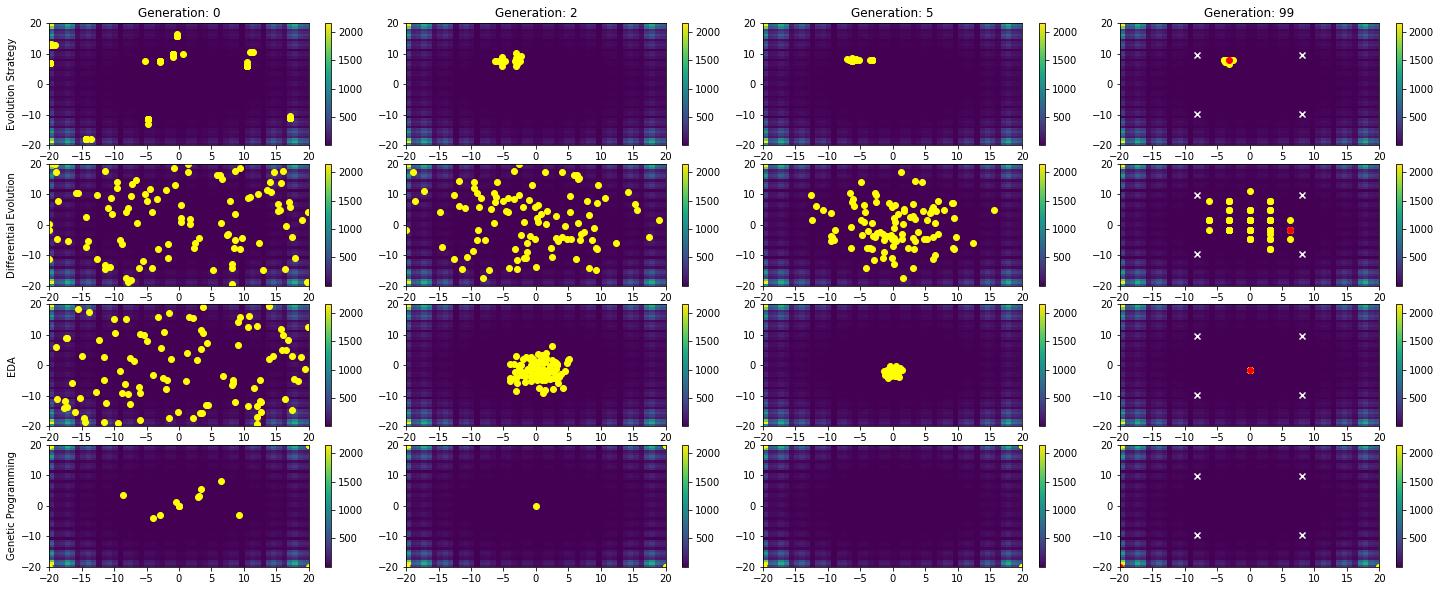

In [ ]:
x = np.linspace(-20, 20, 50)
y = np.linspace(-20, 20, 50)
x, y = np.meshgrid(x,y)
z = abs( np.sin(x)*np.cos(y)*np.exp( abs(1 - np.sqrt(x**2+y**2)/np.pi) ) )

fig, axs = plt.subplots(4, 4, figsize=(25,10))
axs[0,0].set_title('Generation: 0')
axs[0,1].set_title('Generation: 2')
axs[0,2].set_title('Generation: 5')
axs[0,3].set_title('Generation: 99')

plt.subplots_adjust(hspace=0.15)
plt.subplots_adjust(wspace=0.1)

axs[0,0].set_ylabel('Evolution Strategy')
axs[1,0].set_ylabel('Differential Evolution')
axs[2,0].set_ylabel('EDA')
axs[3,0].set_ylabel('Genetic Programming')

for i, epoch in enumerate([0, 2, 5, 99]):

  # Evolution Strategy
  c = axs[0,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[0,i])
  axs[0,i].scatter(es_holder.results[epoch][0], es_holder.results[epoch][1], color='yellow')

  # Differential Evolution
  c = axs[1,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[1,i])
  axs[1,i].scatter(de_holder.results[epoch][0], de_holder.results[epoch][1], color='yellow')

  # EDA
  c = axs[2,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[2,i])
  axs[2,i].scatter(eda_holder.results[epoch][0], eda_holder.results[epoch][1], color='yellow')

  # GP
  c = axs[3,i].pcolormesh(x, y, z, cmap=plt.cm.viridis)
  fig.colorbar(c, ax=axs[3,i])
  axs[3,i].scatter(gp_holder.results[epoch][0], gp_holder.results[epoch][1], color='yellow')

axs[0,-1].scatter(es_holder.best_solution[0], es_holder.best_solution[1], color='red')
axs[1,-1].scatter(de_holder.best_solution[0], de_holder.best_solution[1], color='red')
axs[2,-1].scatter(eda_holder.best_solution[0], eda_holder.best_solution[1], color='red')
axs[3,-1].scatter(gp_holder.best_solution[0], gp_holder.best_solution[1], color='red')

axs[0,-1].scatter(8.05, 9.66, color='white', label='Optimal', marker='x')
axs[1,-1].scatter(8.05, 9.66, color='white', label='Optimal', marker='x')
axs[2,-1].scatter(8.05, 9.66, color='white', label='Optimal', marker='x')
axs[3,-1].scatter(8.05, 9.66, color='white', label='Optimal', marker='x')

axs[0,-1].scatter(8.05, -9.66, color='white', label='Optimal', marker='x')
axs[1,-1].scatter(8.05, -9.66, color='white', label='Optimal', marker='x')
axs[2,-1].scatter(8.05, -9.66, color='white', label='Optimal', marker='x')
axs[3,-1].scatter(8.05, -9.66, color='white', label='Optimal', marker='x')

axs[0,-1].scatter(-8.05, 9.66, color='white', label='Optimal', marker='x')
axs[1,-1].scatter(-8.05, 9.66, color='white', label='Optimal', marker='x')
axs[2,-1].scatter(-8.05, 9.66, color='white', label='Optimal', marker='x')
axs[3,-1].scatter(-8.05, 9.66, color='white', label='Optimal', marker='x')

axs[0,-1].scatter(-8.05, -9.66, color='white', label='Optimal', marker='x')
axs[1,-1].scatter(-8.05, -9.66, color='white', label='Optimal', marker='x')
axs[2,-1].scatter(-8.05, -9.66, color='white', label='Optimal', marker='x')
axs[3,-1].scatter(-8.05, -9.66, color='white', label='Optimal', marker='x')

plt.show()



## Análises e Comparativos

### Melhores desempenhos em mesmo número de execuções

In [ ]:
# Sphere
es_sphere_best = []
de_sphere_best = []
eda_sphere_best = []
gp_sphere_best = []

for _ in range(30):
  es_sphere = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100)
  es_sphere.run()

  de_sphere = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100, population_size=100)
  de_sphere.run()

  eda_sphere = EDA(N=20, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100, population_size=100)
  eda_sphere.run()

  es_sphere_best.append(es_sphere.best_objective)
  de_sphere_best.append(de_sphere.best_objective)
  eda_sphere_best.append(eda_sphere.best_objective)

gp_sphere = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-3,-3], upper_bound=[3,3], problem='Sphere', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_sphere.run()
gp_sphere_best.append(gp_sphere.best_objective)

print('Sphere: OK')


# Rastrigin
es_rastrigin_best = []
de_rastrigin_best = []
eda_rastrigin_best = []
gp_rastrigin_best = []

for _ in range(30):
  es_rastrigin = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100)
  es_rastrigin.run()

  de_rastrigin = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100, population_size=100)
  de_rastrigin.run()

  eda_rastrigin = EDA(N=20, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100, population_size=100)
  eda_rastrigin.run()

  es_rastrigin_best.append(es_rastrigin.best_objective)
  de_rastrigin_best.append(de_rastrigin.best_objective)
  eda_rastrigin_best.append(eda_rastrigin.best_objective)

gp_rastrigin = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], problem='Rastrigin', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_rastrigin.run()
gp_rastrigin_best.append(gp_rastrigin.best_objective)

print('Rastrigin: OK')



# Goldstein-Price
es_goldstein_price_best = []
de_goldstein_price_best = []
eda_goldstein_price_best = []
gp_goldstein_price_best = []

for _ in range(30):
  es_goldstein_price = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100)
  es_goldstein_price.run()

  de_goldstein_price = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100, population_size=100)
  de_goldstein_price.run()

  eda_goldstein_price = EDA(N=20, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100, population_size=100)
  eda_goldstein_price.run()

  es_goldstein_price_best.append(es_goldstein_price.best_objective)
  de_goldstein_price_best.append(de_goldstein_price.best_objective)
  eda_goldstein_price_best.append(eda_goldstein_price.best_objective)

gp_goldstein_price = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-3,-3], upper_bound=[3,3], problem='Goldstein_Price', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_goldstein_price.run()
gp_goldstein_price_best.append(gp_goldstein_price.best_objective)

print('Goldstein-Price: OK')



# Himmelblau
es_himmelblau_best = []
de_himmelblau_best = []
eda_himmelblau_best = []
gp_himmelblau_best = []

for _ in range(30):
  es_himmelblau = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100)
  es_himmelblau.run()

  de_himmelblau = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100, population_size=100)
  de_himmelblau.run()

  eda_himmelblau = EDA(N=20, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100, population_size=100)
  eda_himmelblau.run()

  es_himmelblau_best.append(es_himmelblau.best_objective)
  de_himmelblau_best.append(de_himmelblau.best_objective)
  eda_himmelblau_best.append(eda_himmelblau.best_objective)

gp_himmelblau = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], problem='Himmelblau', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_himmelblau.run()
gp_himmelblau_best.append(gp_himmelblau.best_objective)

print('Himmelblau: OK')



# Holder Table
es_holder_best = []
de_holder_best = []
eda_holder_best = []
gp_holder_best = []

for _ in range(30):
  es_holder = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100)
  es_holder.run()

  de_holder = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100, population_size=100)
  de_holder.run()

  eda_holder = EDA(N=20, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100, population_size=100)
  eda_holder.run()

  es_holder_best.append(es_holder.best_objective)
  de_holder_best.append(de_holder.best_objective)
  eda_holder_best.append(eda_holder.best_objective)

gp_himmelblau = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-20,-20], upper_bound=[20,20], problem='Holder', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_himmelblau.run()
gp_holder_best.append(gp_holder.best_objective)

print('Holder Table: OK')



Sphere: OK
Rastrigin: OK
Goldstein-Price: OK
Himmelblau: OK
Holder Table: OK


Testes de normalidade - Shapiro-Wilk

In [ ]:
print('p-values - Testes de normalidade')
print(stats.shapiro(es_sphere_best)[1])
print(stats.shapiro(de_sphere_best)[1])
print(stats.shapiro(eda_sphere_best)[1])

print(stats.shapiro(es_rastrigin_best)[1])
print(stats.shapiro(de_rastrigin_best)[1])
print(stats.shapiro(eda_rastrigin_best)[1])

print(stats.shapiro(es_goldstein_price_best)[1])
print(stats.shapiro(de_goldstein_price_best)[1])
print(stats.shapiro(eda_goldstein_price_best)[1])

print(stats.shapiro(es_himmelblau_best)[1])
print(stats.shapiro(de_himmelblau_best)[1])
print(stats.shapiro(eda_himmelblau_best)[1])

print(stats.shapiro(es_holder_best)[1])
print(stats.shapiro(de_holder_best)[1])
print(stats.shapiro(eda_holder_best)[1])

p-values - Testes de normalidade
3.95996746505034e-09
1.0
7.766377818629877e-12
3.448105689862757e-11
2.31171816267306e-06
1.3927245163358748e-05
7.790791449469037e-12
1.0
0.00016931226127780974
8.026309217257221e-08
1.0
0.00013964874960947782
8.691065431776224e-07
5.8220007304043975e-06
4.5071557597253786e-10


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Devido à rejeição à normalidade na maioria dos dados (p-values < 0.05), será utilizada mediana e IQR para a comparação dos resultados

In [ ]:
print('Melhores resultados')
print('\n')
print('Sphere')
print(f'ES - Mediana: {np.median(es_sphere_best)}, IQR: {stats.iqr(es_sphere_best)}')
print(f'DE - Mediana: {np.median(de_sphere_best)}, IQR: {stats.iqr(de_sphere_best)}')
print(f'EDA - Mediana: {np.median(eda_sphere_best)}, IQR: {stats.iqr(eda_sphere_best)}')
print(f'GP: {gp_sphere_best[0]}')

print('\n')

print('Rastrigin')
print(f'ES - Mediana: {np.median(es_rastrigin_best)}, IQR: {stats.iqr(es_rastrigin_best)}')
print(f'DE - Mediana: {np.median(de_rastrigin_best)}, IQR: {stats.iqr(de_rastrigin_best)}')
print(f'EDA - Mediana: {np.median(eda_rastrigin_best)}, IQR: {stats.iqr(eda_rastrigin_best)}')
print(f'GP: {gp_rastrigin_best[0]}')

print('\n')

print('Goldstein-Price')
print(f'ES - Mediana: {np.median(es_goldstein_price_best)}, IQR: {stats.iqr(es_goldstein_price_best)}')
print(f'DE - Mediana: {np.median(de_goldstein_price_best)}, IQR: {stats.iqr(de_goldstein_price_best)}')
print(f'EDA - Mediana: {np.median(eda_goldstein_price_best)}, IQR: {stats.iqr(eda_goldstein_price_best)}')
print(f'GP: {gp_goldstein_price_best[0]}')

print('\n')

print('Himmelblau')
print(f'ES - Mediana: {np.median(es_himmelblau_best)}, IQR: {stats.iqr(es_himmelblau_best)}')
print(f'DE - Mediana: {np.median(de_himmelblau_best)}, IQR: {stats.iqr(de_himmelblau_best)}')
print(f'EDA - Mediana: {np.median(eda_himmelblau_best)}, IQR: {stats.iqr(eda_himmelblau_best)}')
print(f'GP: {gp_himmelblau_best[0]}')

print('\n')

print('Holder Table')
print(f'ES - Mediana: {np.median(es_holder_best)}, IQR: {stats.iqr(es_holder_best)}')
print(f'DE - Mediana: {np.median(de_holder_best)}, IQR: {stats.iqr(de_holder_best)}')
print(f'EDA - Mediana: {np.median(eda_holder_best)}, IQR: {stats.iqr(eda_holder_best)}')
print(f'GP: {gp_holder_best[0]}')


Melhores resultados


Sphere
ES - Mediana: 1.8253634140581678e-06, IQR: 5.114677366910568e-06
DE - Mediana: 1.717651377164586e-22, IQR: 4.774735183902095e-22
EDA - Mediana: 2.2852105447012605e-45, IQR: 2.407193002708599e-19
GP: 8


Rastrigin
ES - Mediana: 0.002613933355243958, IQR: 0.008846750782569579
DE - Mediana: 0.0, IQR: 6.217248937900877e-15
EDA - Mediana: 0.03432052067642033, IQR: 0.9953280088446492
GP: 18.0


Goldstein-Price
ES - Mediana: 3.000635365984774, IQR: 0.0025448034612480797
DE - Mediana: 2.999999999999926, IQR: 3.1086244689504383e-15
EDA - Mediana: 7.457973068742863, IQR: 11.165888300901777
GP: 1150.9971394335657


Himmelblau
ES - Mediana: 1.1661855288117164, IQR: 2.7021139028263734
DE - Mediana: 1.16604445715281, IQR: 0.0
EDA - Mediana: 1.9949152305140716, IQR: 2.6882029817866564
GP: 8.125


Holder Table
ES - Mediana: 1.6177425275358633e-06, IQR: 1.2761831596801454e-05
DE - Mediana: 3.3991349271102764e-10, IQR: 8.886718655154057e-10
EDA - Mediana: 3.5773426887266767e

Comentários:
<br>
Para problemas mais simples, com um único ótimo global, como o caso da Sphere e Rastrigin, todos os métodos (exceto o GP) parecem obter resultados semelhantes, apesar das diferentes casas decimais em cada um.
<br>
<br>
O problema de Goldstein-Price é uma função com formato em que o mínimo global se encontra em uma região quase plana e bastante sensível, onde qualquer modificação nos inputs leva a valores grandes da saída da função. Nesse caso, os métodos ES e DE conseguiram alcançar com boa precisão o mínimo global de forma concisa. No entanto, o método de EDA, mostrou bom desempenho nos problemas mais simples, nesse caso não se saiu tão bem, ocorrendo algumas execuções errôneas que distanciaram a mediana do valor ótimo.
<br>
<br>
No problema de Himmelblau, com 4 mínimos globais, o método de EDA também não se saiu bem, ocorrendo algumas execuções errôneas que fizeram a mediana se distanciar do valor ótimo. (Observe também que devido aos limites do domínio não foi alcançado o ótimo global 0 em nenhum caso, pois este se encontra fora do domínio definido no exercício.
<br>
<br>
No problema de Holder Table, onde há 4 mínimos globais e 1 mínimo local mais evidente ao centro, todos os métodos foram atraídos para esse mínimo local, não conseguindo alcançar nenhum dos mínimos globais.
<br>
<br>
Por fim, o método de de Genetic Programming demonstrou resultados ruins em todos os problemas. Uma hipótese para isso pode ser que, devido sua instabilidade, não houveram gerações suficientes para obter bons resultados.

### Percentuais de execuções bem sucedidas

In [ ]:
total = 30

# Sphere
es_sphere_success = 0
de_sphere_success = 0
eda_sphere_success = 0
optimal_sphere = 0
for _ in range(total):

  es_sphere = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100)
  es_sphere.run()
  if es_sphere.best_objective - optimal_sphere < 0.01:
    es_sphere_success += 1

  de_sphere = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100, population_size=100)
  de_sphere.run()
  if de_sphere.best_objective - optimal_sphere < 0.01:
    de_sphere_success += 1

  eda_sphere = EDA(N=20, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100, population_size=100)
  eda_sphere.run()
  if eda_sphere.best_objective - optimal_sphere < 0.01:
    eda_sphere_success += 1

es_sphere_success_rate = (es_sphere_success / total)*100
de_sphere_success_rate = (de_sphere_success / total)*100
eda_sphere_success_rate = (eda_sphere_success / total)*100

print('Sphere: OK')


# Rastrigin
es_rastrigin_success = 0
de_rastrigin_success = 0
eda_rastrigin_success = 0
optimal_rastrigin = 0
for _ in range(total):
  es_rastrigin = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100)
  es_rastrigin.run()
  if es_rastrigin.best_objective - optimal_rastrigin < 0.01:
    es_rastrigin_success += 1

  de_rastrigin = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100, population_size=100)
  de_rastrigin.run()
  if de_rastrigin.best_objective - optimal_rastrigin < 0.01:
    de_rastrigin_success += 1

  eda_rastrigin = EDA(N=20, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100, population_size=100)
  eda_rastrigin.run()
  if eda_rastrigin.best_objective - optimal_rastrigin < 0.01:
    eda_rastrigin_success += 1

es_rastrigin_success_rate = (es_rastrigin_success / total)*100
de_rastrigin_success_rate = (de_rastrigin_success / total)*100
eda_rastrigin_success_rate = (eda_rastrigin_success / total)*100

print('Rastrigin: OK')



# Goldstein-Price
es_goldstein_price_success = 0
de_goldstein_price_success = 0
eda_goldstein_price_success = 0
optimal_goldstein_price = 3
for _ in range(total):
  es_goldstein_price = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100)
  es_goldstein_price.run()
  if es_goldstein_price.best_objective - optimal_goldstein_price < 0.01:
    es_goldstein_price_success += 1

  de_goldstein_price = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100, population_size=100)
  de_goldstein_price.run()
  if de_goldstein_price.best_objective - optimal_goldstein_price < 0.01:
    de_goldstein_price_success += 1

  eda_goldstein_price = EDA(N=20, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100, population_size=100)
  eda_goldstein_price.run()
  if eda_goldstein_price.best_objective - optimal_goldstein_price < 0.01:
    eda_goldstein_price_success += 1

es_goldstein_price_success_rate = (es_goldstein_price_success / total)*100
de_goldstein_price_success_rate = (de_goldstein_price_success / total)*100
eda_goldstein_price_success_rate = (eda_goldstein_price_success / total)*100

print('Goldstein-Price: OK')



# Himmelblau
es_himmelblau_success = 0
de_himmelblau_success = 0
eda_himmelblau_success = 0
optimal_himmelblau = 1.16
for _ in range(total):
  es_himmelblau = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100)
  es_himmelblau.run()
  if es_himmelblau.best_objective - optimal_himmelblau < 0.01:
    es_himmelblau_success += 1

  de_himmelblau = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100, population_size=100)
  de_himmelblau.run()
  if de_himmelblau.best_objective - optimal_himmelblau < 0.01:
    de_himmelblau_success += 1

  eda_himmelblau = EDA(N=20, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100, population_size=100)
  eda_himmelblau.run()
  if eda_himmelblau.best_objective - optimal_himmelblau < 0.01:
    eda_himmelblau_success += 1

es_himmelblau_success_rate = (es_himmelblau_success / total)*100
de_himmelblau_success_rate = (de_himmelblau_success / total)*100
eda_himmelblau_success_rate = (eda_himmelblau_success / total)*100

print('Himmelblau: OK')



# Holder Table
es_holder_success = 0
de_holder_success = 0
eda_holder_success = 0
optimal_holder = -20
for _ in range(total):
  es_holder = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100)
  es_holder.run()
  if es_holder.best_objective - optimal_holder < 0.01:
    es_holder_success += 1

  de_holder = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100, population_size=100)
  de_holder.run()
  if de_holder.best_objective - optimal_holder < 0.01:
    de_holder_success += 1

  eda_holder = EDA(N=20, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100, population_size=100)
  eda_holder.run()
  if eda_holder.best_objective - optimal_holder < 0.01:
    eda_holder_success += 1

es_holder_success_rate = (es_holder_success / total)*100
de_holder_success_rate = (de_holder_success / total)*100
eda_holder_success_rate = (eda_holder_success / total)*100

print('Holder Table: OK')



Sphere: OK
Rastrigin: OK
Goldstein-Price: OK
Himmelblau: OK
Holder Table: OK


In [ ]:
print('Percentuais de bem sucedidos')
print('\n')
print('Sphere')
print(f'ES: {es_sphere_success_rate}%')
print(f'DE: {de_sphere_success_rate}%')
print(f'EDA: {eda_sphere_success_rate}%')

print('\n')

print('Rastrigin')
print(f'ES: {es_rastrigin_success_rate}%')
print(f'DE: {de_rastrigin_success_rate}%')
print(f'EDA: {eda_rastrigin_success_rate}%')

print('\n')

print('Goldstein-Price')
print(f'ES: {es_goldstein_price_success_rate}%')
print(f'DE: {de_goldstein_price_success_rate}%')
print(f'EDA: {eda_goldstein_price_success_rate}%')

print('\n')

print('Himmelblau')
print(f'ES: {es_himmelblau_success_rate}%')
print(f'DE: {de_himmelblau_success_rate}%')
print(f'EDA: {eda_himmelblau_success_rate}%')

print('\n')

print('Holder Table')
print(f'ES: {es_holder_success_rate}%')
print(f'DE: {de_holder_success_rate}%')
print(f'EDA: {eda_holder_success_rate}%')


Percentuais de bem sucedidos


Sphere
ES: 100.0%
DE: 100.0%
EDA: 100.0%


Rastrigin
ES: 73.33333333333333%
DE: 100.0%
EDA: 56.666666666666664%


Goldstein-Price
ES: 60.0%
DE: 100.0%
EDA: 26.666666666666668%


Himmelblau
ES: 56.666666666666664%
DE: 100.0%
EDA: 23.333333333333332%


Holder Table
ES: 0.0%
DE: 0.0%
EDA: 0.0%


Comentários: É possível observar que os métodos performaram bem no problema simples como o da esfera. No entanto, nenhum deles conseguiu encontrar o mínimo global em problemas mais difíceis, com múltiplos mínimos globais espalhados e diversos mínimos locais concentrados, como na função Holder Table. O destaque é dado ao método DE, que performou bem nos outros quatro problemas. Devido à questão de tempo, não foi testado o método GP, que de qualquer forma, em testes anteriores, demonstrou bastante instabilidade, não sendo esperado bons resultados neste teste também.

### Tempo decorrido

In [ ]:
# Sphere
es_sphere_time = []
de_sphere_time = []
eda_sphere_time = []
gp_sphere_time = []

for _ in range(30):
  start = time()
  es_sphere = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100)
  es_sphere.run()
  end = time()
  es_sphere_time.append(end-start)

  start = time()
  de_sphere = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100, population_size=100)
  de_sphere.run()
  end = time()
  de_sphere_time.append(end-start)

  start = time()
  eda_sphere = EDA(N=20, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Sphere', generations=100, population_size=100)
  eda_sphere.run()
  end = time()
  eda_sphere_time.append(end-start)

start = time()
gp_sphere = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-3,-3], upper_bound=[3,3], problem='Sphere', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_sphere.run()
end = time()
gp_sphere_time.append(end-start)

print('Sphere: OK')


# Rastrigin
es_rastrigin_time = []
de_rastrigin_time = []
eda_rastrigin_time = []
gp_rastrigin_time = []

for _ in range(30):
  start = time()
  es_rastrigin = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100)
  es_rastrigin.run()
  end = time()
  es_rastrigin_time.append(end-start)


  start = time()
  de_rastrigin = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100, population_size=100)
  de_rastrigin.run()
  end = time()
  de_rastrigin_time.append(end-start)


  start = time()
  eda_rastrigin = EDA(N=20, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], dimension=2, problem='Rastrigin', generations=100, population_size=100)
  eda_rastrigin.run()
  end = time()
  eda_rastrigin_time.append(end-start)

start = time()
gp_rastrigin = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-5.12,-5.12], upper_bound=[5.12,5.12], problem='Rastrigin', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_sphere.run()
end = time()
gp_rastrigin_time.append(end-start)

print('Rastrigin: OK')


# Goldstein-Price
es_goldstein_price_time = []
de_goldstein_price_time = []
eda_goldstein_price_time = []
gp_goldstein_price_time = []

for _ in range(30):
  start = time()
  es_goldstein_price = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100)
  es_goldstein_price.run()
  end = time()
  es_goldstein_price_time.append(end-start)


  start = time()
  de_goldstein_price = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100, population_size=100)
  de_goldstein_price.run()
  end = time()
  de_goldstein_price_time.append(end-start)


  start = time()
  eda_goldstein_price = EDA(N=20, lower_bound=[-3,-3], upper_bound=[3,3], dimension=2, problem='Goldstein_Price', generations=100, population_size=100)
  eda_goldstein_price.run()
  end = time()
  eda_goldstein_price_time.append(end-start)

start = time()
gp_goldstein_price = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-3,-3], upper_bound=[3,3], problem='Goldstein_Price', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_goldstein_price.run()
end = time()
gp_goldstein_price_time.append(end-start)

print('Goldstein-Price: OK')



# Himmelblau
es_himmelblau_time = []
de_himmelblau_time = []
eda_himmelblau_time = []
gp_himmelblau_time = []

for _ in range(30):
  start = time()
  es_himmelblau = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100)
  es_himmelblau.run()
  end = time()
  es_himmelblau_time.append(end-start)

  start = time()
  de_himmelblau = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100, population_size=100)
  de_himmelblau.run()
  end = time()
  de_himmelblau_time.append(end-start)

  start = time()
  eda_himmelblau = EDA(N=20, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], dimension=2, problem='Himmelblau', generations=100, population_size=100)
  eda_himmelblau.run()
  end = time()
  eda_himmelblau_time.append(end-start)

start = time()
gp_himmelblau = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-3.5,-3.5], upper_bound=[2.8,2.8], problem='Himmelblau', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_himmelblau.run()
end = time()
gp_himmelblau_time.append(end-start)

print('Himmelblau: OK')



# Holder Table
es_holder_time = []
de_holder_time = []
eda_holder_time = []
gp_holder_time = []

for _ in range(30):
  start = time()
  es_holder = EvolutionStrategy(mu=10, lamb=100, mutation=0.1, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100)
  es_holder.run()
  end = time()
  es_holder_time.append(end-start)

  start = time()
  de_holder = DifferentialEvolution(F=0.5, CR=0.8, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100, population_size=100)
  de_holder.run()
  end = time()
  de_holder_time.append(end-start)

  start = time()
  eda_holder = EDA(N=20, lower_bound=[-20,-20], upper_bound=[20,20], dimension=2, problem='Holder', generations=100, population_size=100)
  eda_holder.run()
  end = time()
  eda_holder_time.append(end-start)

start = time()
gp_holder = GeneticProgramming(min_depth=1, max_depth=10, lower_bound=[-20,-20], upper_bound=[20,20], problem='Holder', mutation_rate=0.1, crossover_rate=0.8, generations=100, population_size=20)
gp_holder.run()
end = time()
gp_holder_time.append(end-start)

print('Holder Table: OK')



Sphere: OK
Rastrigin: OK
Goldstein-Price: OK
Himmelblau: OK
Holder Table: OK


Testes de normalidade - Shapiro-Wilk

In [ ]:
print('p-values - Testes de normalidade')
print(stats.shapiro(es_sphere_time)[1])
print(stats.shapiro(de_sphere_time)[1])
print(stats.shapiro(eda_sphere_time)[1])

print(stats.shapiro(es_rastrigin_time)[1])
print(stats.shapiro(de_rastrigin_time)[1])
print(stats.shapiro(eda_rastrigin_time)[1])

print(stats.shapiro(es_goldstein_price_time)[1])
print(stats.shapiro(de_goldstein_price_time)[1])
print(stats.shapiro(eda_goldstein_price_time)[1])

print(stats.shapiro(es_himmelblau_time)[1])
print(stats.shapiro(de_himmelblau_time)[1])
print(stats.shapiro(eda_himmelblau_time)[1])

print(stats.shapiro(es_holder_time)[1])
print(stats.shapiro(de_holder_time)[1])
print(stats.shapiro(eda_holder_time)[1])

p-values - Testes de normalidade
0.01995236426591873
0.16809388995170593
0.8288730382919312
7.876580639276654e-05
0.017286434769630432
0.02333201840519905
1.0320296617294389e-08
0.00015521852765232325
0.0035812982823699713
3.399889436650483e-08
0.0036301116924732924
0.4817366302013397
0.06881769746541977
4.634169090422802e-05
0.0007306648185476661


Devido à aceitação da normalidade na maioria dos dados (p-values > 0.05), será utilizada mediana e IQR para a comparação dos resultados

In [ ]:
print('Tempo decorrido')
print('\n')
print('Sphere')
print(f'ES - Mediana: {np.median(es_sphere_time)}, IQR: {stats.iqr(es_sphere_time)}')
print(f'DE - Mediana: {np.median(de_sphere_time)}, IQR: {stats.iqr(de_sphere_time)}')
print(f'EDA - Mediana: {np.median(eda_sphere_time)}, IQR: {stats.iqr(eda_sphere_time)}')
print(f'GP: {eda_sphere_time[0]}')

print('\n')

print('Rastrigin')
print(f'ES - Mediana: {np.median(es_rastrigin_time)}, IQR: {stats.iqr(es_rastrigin_time)}')
print(f'DE - Mediana: {np.median(de_rastrigin_time)}, IQR: {stats.iqr(de_rastrigin_time)}')
print(f'EDA - Mediana: {np.median(eda_rastrigin_time)}, IQR: {stats.iqr(eda_rastrigin_time)}')
print(f'GP: {eda_rastrigin_time[0]}')

print('\n')

print('Goldstein-Price')
print(f'ES - Mediana: {np.median(es_goldstein_price_time)}, IQR: {stats.iqr(es_goldstein_price_time)}')
print(f'DE - Mediana: {np.median(de_goldstein_price_time)}, IQR: {stats.iqr(de_goldstein_price_time)}')
print(f'EDA - Mediana: {np.median(eda_goldstein_price_time)}, IQR: {stats.iqr(eda_goldstein_price_time)}')
print(f'GP: {eda_goldstein_price_time[0]}')

print('\n')

print('Himmelblau')
print(f'ES - Mediana: {np.median(es_himmelblau_time)}, IQR: {stats.iqr(es_himmelblau_time)}')
print(f'DE - Mediana: {np.median(de_himmelblau_time)}, IQR: {stats.iqr(de_himmelblau_time)}')
print(f'EDA - Mediana: {np.median(eda_himmelblau_time)}, IQR: {stats.iqr(eda_himmelblau_time)}')
print(f'GP: {eda_himmelblau_time[0]}')

print('\n')

print('Holder Table')
print(f'ES - Média: {np.median(es_holder_time)}, IQR: {stats.iqr(es_holder_time)}')
print(f'DE - Média: {np.median(de_holder_time)}, IQR: {stats.iqr(de_holder_time)}')
print(f'EDA - Média: {np.median(eda_holder_time)}, IQR: {stats.iqr(eda_holder_time)}')
print(f'GP: {eda_holder_time[0]}')

Tempo decorrido


Sphere
ES - Mediana: 0.37687861919403076, IQR: 0.02610999345779419
DE - Mediana: 0.3887791633605957, IQR: 0.021150290966033936
EDA - Mediana: 1.3847265243530273, IQR: 0.0539088249206543
GP: 1.3760688304901123


Rastrigin
ES - Mediana: 0.4097713232040405, IQR: 0.014288067817687988
DE - Mediana: 0.4833477735519409, IQR: 0.023352622985839844
EDA - Mediana: 1.3609434366226196, IQR: 0.05218470096588135
GP: 1.3910162448883057


Goldstein-Price
ES - Mediana: 0.39209556579589844, IQR: 0.01135021448135376
DE - Mediana: 0.4329512119293213, IQR: 0.010148406028747559
EDA - Mediana: 1.3439983129501343, IQR: 0.027987360954284668
GP: 1.3306529521942139


Himmelblau
ES - Mediana: 0.3278064727783203, IQR: 0.015341758728027344
DE - Mediana: 0.27209997177124023, IQR: 0.009973227977752686
EDA - Mediana: 1.2625960111618042, IQR: 0.028090715408325195
GP: 1.2679967880249023


Holder Table
ES - Média: 0.38549745082855225, IQR: 0.0156937837600708
DE - Média: 0.4177243709564209, IQR: 0.0122085

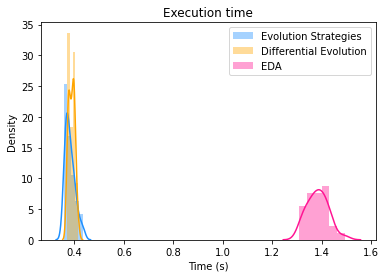

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.distplot(es_sphere_time, color="dodgerblue", label="Evolution Strategies")
sns.distplot(de_sphere_time, color="orange", label="Differential Evolution")
sns.distplot(eda_sphere_time, color="deeppink", label="EDA")
plt.title('Execution time')
plt.legend()
plt.xlabel('Time (s)')
plt.show()

Comentários:
Em todos os problemas, os métodos ES e DE parecem ter tempos de execução parecidos. Além disso, em todos os problemas, o método de EDA parece ter um maior custo computacional (abaixo teste de hipótese para avaliar). Apesar disso, é importante se atentar que essas análises de tempo de execução se referem à implementação realizada, podendo-se obter resultados diferentes em outras implementações. Por fim, o método GP, além de demonstrar resultados ruins de desempenho, também demonstrou um tempo maior que os dois primeiros descritos acima, não compensando o mau desempenho

In [ ]:
_, p_value2 = stats.mannwhitneyu(eda_sphere_time, de_sphere_time)
print(f'p-value: {p_value2:.3f}, para α = 0.05, rejeita-se H0\n')
print('Conclusão: Para α = 0.05, há evidências suficientes para sustentar o maior tempo de execução do método EDA')

p-value: 0.000, para α = 0.05, rejeita-se H0

Conclusão: Para α = 0.05, há evidências suficientes para sustentar o maior tempo de execução do método EDA


# Problema da Mochila - Multiple-Knapsack 0/1 problem

In [ ]:
class MultipleKnapsackIndividual:
  def __init__(self, bag_chromossome_size, bags):
    self.chromossome = [[random.randint(0,1) for _ in range(bag_chromossome_size)] for b in range(bags)] # [bag1, bag2] -> bag=[1,1,0,..,1]
    self.fitness = 0.1 # diferente de 0 para evitar divisão por 0 no inicio da amostragem
    self.bags = bags
    self.volume = [0]*self.bags

  def mutate(self, mutation_rate):
    for b, bag in enumerate(self.chromossome):
      for i in range(len(bag)):
        if random.random() < mutation_rate:
          self.chromossome[b][i] = self.chromossome[b][i]^1 # bool -> 1 to 0 / 0 to 1

  @staticmethod
  def crossover(parent_a, parent_b):
    child = MultipleKnapsackIndividual(bag_chromossome_size=len(parent_a.chromossome), bags=len(parent_a.chromossome))
    rand_gene_position = random.randint(0, len(parent_a.chromossome)-1)
    for bag in range(len(parent_a.chromossome)):
      child.chromossome[bag] = parent_a.chromossome[bag][:rand_gene_position] + parent_b.chromossome[bag][rand_gene_position:]

    return child

class MultipleKnapsackProblem:
  def __init__(self, bags, bags_limit, values, volumes, generations, population_size, mutation_rate):
    self.bags = bags
    self.bags_limit = bags_limit
    self.values = values
    self.volumes = volumes
    self.generations = generations
    self.mutation_rate = mutation_rate
    self.population_size = population_size
    self.population = []
    self.total_fitness = 0

  def generate(self):
    for _ in range(self.population_size):
      self.population.append(MultipleKnapsackIndividual(bag_chromossome_size = len(self.values), bags=self.bags))

  def evaluate(self):
    for individual in self.population:
      total_volume = [0]*self.bags # volume total de cada mochila
      item_pos = [[0] for _ in range(self.bags)] # posições dos itens adicionados na mochila
      total_value = [0]*self.bags # valor total de cada mochila

      items_duplicated = [1] # para poder iniciar o while abaixo
      while len(items_duplicated) > 0: # checa se há um mesmo item em mais de uma mochila
        items_duplicated = []

        for bag in range(self.bags):
          total_volume[bag] = self.bags_limit[bag] + 1 # para poder iniciar o while abaixo
          item_pos[bag] = []

          # enquanto alguma mochila exceder o limite, joga itens fora e recalcula os valores
          while (total_volume[bag] > self.bags_limit[bag]) or len(items_duplicated) > 0:
            total_volume[bag] = 0
            item_pos[bag] = []
            total_value[bag] = 0

            for j in range(len(individual.chromossome[bag])):
              if individual.chromossome[bag][j] == 1: # se o gene estiver ativado, adiciona item na mochila
                total_volume[bag] += self.volumes[j]
                total_value[bag] += self.values[j]
                item_pos[bag] += [j] # posições dos itens adicionados

            # se exceder o limite da mochila uma qtd aleatória de gene é desativada (itens jogados fora)
            if total_volume[bag] > self.bags_limit[bag]:
              individual.chromossome[bag][item_pos[bag][random.randint(0, len(item_pos[bag])-1)]] = 0

        """
        Pega as posições dos itens que estão em duas ou mais mochilas (duplicados)
        ex:
        item_pos = [[1,3,5], [1,2,12,5], [3,5,12]] (posições dos itens de 3 mochilas)
        all_item_pos = [1,3,5,1,2,12,5,3,5,12]
        items_duplicated  [1,3,5,12] (posições dos items que estão em duas ou mais mochilas)
        """
        all_item_pos = sum(item_pos, [])
        items_duplicated = [item for item, count in collections.Counter(all_item_pos).items() if count > 1] # posições de itens duplicados

        if len(items_duplicated) > 0: # se houverem itens duplicados
          # seleciona uma bag aleatória e zera o chromossomo na posição do item duplicado
          random_bag = random.randint(0, self.bags-1)
          individual.chromossome[random_bag][items_duplicated[random.randint(0, len(items_duplicated)-1)]] = 0

      # salva valores
      individual.volume = total_volume
      individual.fitness = sum(total_value)

  def reproduct(self):
    self.calculate_total_fitness()
    childs = []

    for n in range(self.population_size):
      parent_a = self.select() # amostra um individuo da população
      parent_b = self.select() # amostra outro individuo da população

      child = MultipleKnapsackIndividual.crossover(parent_a, parent_b)
      child.mutate(self.mutation_rate)
      childs.append(child)

    self.population = childs.copy()

  def select(self):
    """Amostra um indivíduo com probabilidade de acordo com o fitness
    1-Gera um valor aleatório rand_value
    2-Itera sobre os individuos imaginando que respectivos fitness estão empilhados
    3-Compara o valor rand com a altura da pilha e seleciona o individuo na mesma altura
    ex: AAAAAAAAABBBBCCCCCC # pilha de individuos A,B,C com fitness 9, 4 e 6, respectivamente
        VVVV # rand_value = 4, seleciona o individuo A
        VVVVVVVVVVVV # rand_value = 12, seleciona individuo B
        VVVVVVVVVVVVVVVVV # rand_value = 17, seleciona individuo C
    """

    rand_value = self.total_fitness * random.random()
    for individual in self.population:
      rand_value = rand_value - individual.fitness

      if rand_value <= 0:
        return individual


  def calculate_total_fitness(self):
    self.total_fitness = 0

    for individual in self.population:
      self.total_fitness += individual.fitness

  def get_best_individual(self):
    best_individual = MultipleKnapsackIndividual(bag_chromossome_size = len(self.values), bags=self.bags)
    for individual in self.population:
      if individual.fitness > best_individual.fitness:
        best_individual = individual
    return best_individual

  def run(self):

    self.generate()

    for i in range(self.generations):
      self.evaluate()
      self.reproduct()
    self.evaluate()
    self.best_individual = self.get_best_individual()

In [ ]:
mkp = MultipleKnapsackProblem(bags=2, bags_limit=[10,8], values=[3,2,1,2,1,4,1,1,1,3,2,2,3,1,3], volumes=[3,2,1,2.2,1.4,3.8,0.2,0.1,0.13,2.8,1.5,2,3.1,1.2,1.7], generations=100, population_size=1000, mutation_rate=0.01)
mkp.run()
print(f'Maior fitness: {mkp.best_individual.fitness}')
print(f'Itens das mochilas: {mkp.best_individual.chromossome}')
print(f'Volume de cada mochila: {mkp.best_individual.volume}')

Maior fitness: 22
Itens das mochilas: [[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0]]
Volume de cada mochila: [10.0, 7.63]


Teste com 15 itens de valor 1 e peso 1 para ver se é encontrado fitness = 15 e soma dos pesos = 15, validando o código

In [ ]:
mkp = MultipleKnapsackProblem(bags=3, bags_limit=[10,8,10], values=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], volumes=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], generations=100, population_size=1000, mutation_rate=0.01)
mkp.run()
print(f'Maior fitness: {mkp.best_individual.fitness}')
print(f'Itens das mochilas: {mkp.best_individual.chromossome}')
print(f'Volume de cada mochila: {mkp.best_individual.volume}')

Maior fitness: 15
Itens das mochilas: [[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0], [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]]
Volume de cada mochila: [5, 6, 4]


Fitness = 15 OK!
Volume total = 5+6+4 = 15 OK!